<a href="https://colab.research.google.com/github/samin-batra/100daysofcode/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [149]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [150]:
%pip install --upgrade plotly
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [151]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [152]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [250]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [154]:
df_data.shape

(4324, 9)

In [248]:
df_data.columns
df_data.isna().value_counts()
df_data.dropna(inplace=True)

In [251]:

df_data.isna().value_counts()

Unnamed: 0  Unnamed: 0.1  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False       False         False         False     False  False   False          True   False             3360
                                                                                False  False              964
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [109]:
# df_data.duplicated().value_counts()

False    964
dtype: int64

In [253]:
df_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

## Descriptive Statistics

In [254]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [258]:
grouped_org = df_data.groupby('Organisation').size().reset_index(name='counts')
px.bar(grouped_org,x=grouped_org['Organisation'],y='counts')

In [259]:
grouped_org

,Organisation,counts
0,AEB,3
1,AMBA,8
2,ASI,9
3,Arianespace,279
4,Arm??e de l'Air,4
5,Blue Origin,12
6,Boeing,136
7,CASC,251
8,CASIC,5
9,CECLES,4


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [260]:
df_data['Rocket_Status'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [261]:
df_data[df_data['Rocket_Status']=='StatusActive'].count()
df_data[df_data['Rocket_Status']=='StatusRetired'].count()

Organisation      3534
Location          3534
Date              3534
Detail            3534
Rocket_Status     3534
Price              378
Mission_Status    3534
dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [262]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [263]:
print(df_data[df_data['Mission_Status']=='Success'].count())
print(df_data[df_data['Mission_Status']=='Failure'].count())

Organisation      3879
Location          3879
Date              3879
Detail            3879
Rocket_Status     3879
Price              910
Mission_Status    3879
dtype: int64
Organisation      339
Location          339
Date              339
Detail            339
Rocket_Status     339
Price              36
Mission_Status    339
dtype: int64


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [264]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [265]:
px.histogram(df_data,x='Price',nbins=5)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [266]:
df_data['Country'] = df_data['Location'].str.split(",").str[-1]
# df_data[df_data['Country']==' Pacific Missile Range Facility']['Country'] = 'USA'
# df_data[df_data['Country']==' Yellow Sea']['Country'] = 'China'
# df_data[df_data['Country']==' Gran Canaria']['Country'] = 'USA' 
df_data['Country'] = df_data['Country'].str.strip()

In [267]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [268]:
df_data.loc[df_data['Country']=='Pacific Missile Range Facility',['Country']] = 'USA'
df_data.loc[df_data['Country']=='Yellow Sea',['Country']] = 'China'
df_data.loc[df_data['Country']=='Gran Canaria',['Country']] = 'USA'
df_data.loc[df_data['Country']=='New Mexico',['Country']] = 'USA'
df_data.loc[df_data['Country']=='Shahrud Missile Test Site',['Country']] = 'Iran' 
df_data.loc[df_data['Country']=='Barents Sea',['Country']] = 'Russia' 

# df_data.loc[df_data['Country']=='Russia']
print(df_data['Country'].unique())

['USA' 'China' 'Kazakhstan' 'Japan' 'Israel' 'New Zealand' 'Russia' 'Iran'
 'France' 'India' 'North Korea' 'Pacific Ocean' 'South Korea' 'Brazil'
 'Kenya' 'Australia']


In [165]:
# df_data[df_data['Country']=='Yellow Sea']['Country']

Series([], Name: Country, dtype: object)

In [269]:
print(df_data['Country'].unique())
# df_data
countries.get('New Zealand')

['USA' 'China' 'Kazakhstan' 'Japan' 'Israel' 'New Zealand' 'Russia' 'Iran'
 'France' 'India' 'North Korea' 'Pacific Ocean' 'South Korea' 'Brazil'
 'Kenya' 'Australia']


Country(name='New Zealand', alpha2='NZ', alpha3='NZL', numeric='554', apolitical_name='New Zealand')

# Use a Choropleth Map to Show the Number of Failures by Country


In [279]:
df_data.loc[df_data['Country']=='China',['Country Code']] = countries.get('China').alpha3
df_data.loc[df_data['Country']=='USA',['Country Code']] = countries.get('us').alpha3
df_data.loc[df_data['Country']=='Kazakhstan',['Country Code']] = countries.get('Kazakhstan').alpha3
df_data.loc[df_data['Country']=='Japan',['Country Code']] = countries.get('Japan').alpha3
df_data.loc[df_data['Country']=='New Zealand',['Country Code']] = countries.get('New Zealand').alpha3
df_data.loc[df_data['Country']=='Russia',['Country Code']] = countries.get('Russian Federation').alpha3
df_data.loc[df_data['Country']=='France',['Country Code']] = countries.get('France').alpha3
df_data.loc[df_data['Country']=='Israel',['Country Code']] = countries.get('Israel').alpha3
df_data.loc[df_data['Country']=='Iran',['Country Code']] = countries.get(364).alpha3
df_data.loc[df_data['Country']=='India',['Country Code']] = countries.get('India').alpha3
df_data.loc[df_data['Country']=='North Korea',['Country Code']] = countries.get(408).alpha3
df_data.loc[df_data['Country']=='Brazil',['Country Code']] = countries.get('Brazil').alpha3
df_data.loc[df_data['Country']=='Kenya',['Country Code']] = countries.get('Kenya').alpha3
df_data.loc[df_data['Country']=='Australia',['Country Code']] = countries.get('Australia').alpha3


In [280]:
# countries.get('russian federation')
df_failures = df_data[df_data['Mission_Status']=='Failure']

In [277]:
countries.get('kp')

Country(name="Korea, Democratic People's Republic of", alpha2='KP', alpha3='PRK', numeric='408', apolitical_name="Korea, Democratic People's Republic of")

In [281]:
failed_missions = df_failures.groupby('Country Code').size().reset_index(name='counts')
px.choropleth(failed_missions, locations="Country Code",
                    color="counts", # lifeExp is a column of gapminder
                    hover_name="Country Code", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
# failed_missions.head(
# )

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [282]:
# df_org_country = df_data.groupby(['Organisation','Country','Mission_Status']).size()
df_org_country = df_data.groupby(['Organisation','Mission_Status','Country']).size().reset_index(name='counts')
# df_data.head()
df_org_country.head()

,Organisation,Mission_Status,Country,counts
0,AEB,Failure,Brazil,2
1,AEB,Prelaunch Failure,Brazil,1
2,AMBA,Failure,USA,3
3,AMBA,Partial Failure,USA,1
4,AMBA,Success,Australia,1


In [283]:
px.sunburst(
    df_org_country,
    path=['Organisation','Mission_Status','Country'],values='counts'
)

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [284]:
# df_data.groupby('Organisation').agg({'Price':'sum'})
df_data['Price'].unique()
df_data['Price'] = df_data['Price'].str.split(",").str.join("")
# df_data['Price'] = pd.to_numeric(df_data['Price'])

In [285]:
df_data['Price'] = pd.to_numeric(df_data['Price'])

In [286]:
df_prices = df_data.groupby('Organisation',as_index = False).agg({'Price':'sum'})


# Analyse the Amount of Money Spent by Organisation per Launch

In [287]:
df_data.head()
df_data.groupby('Organisation').agg({'Price':'mean'})

,Price
Organisation,
AEB,NaN
AMBA,NaN
ASI,NaN
Arianespace,170.26
Arm??e de l'Air,NaN
Blue Origin,NaN
Boeing,177.29
CASC,40.13
CASIC,NaN


# Chart the Number of Launches per Year

In [288]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
 7   Country         4324 non-null   object 
 8   Country Code    4285 non-null   object 
dtypes: float64(1), object(8)
memory usage: 304.2+ KB


In [289]:
df_data['Date'] = pd.to_datetime(df_data['Date'],utc=True)
df_data['Year']=pd.DatetimeIndex(df_data['Date']).year


In [290]:
df_year = df_data.groupby('Year').size().reset_index(name='counts')
px.bar(df_year,x = 'Year',y='counts')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [291]:
df_data['Month']=pd.DatetimeIndex(df_data['Date']).month

In [292]:
# df_data.groupby('Month').size().reset_index(name='counts')
df_data['Year-Month'] = df_data['Year'].astype('str') + "-" + df_data['Month'].astype('str') + "-01"

In [293]:
df_data['Year-Month'] = pd.to_datetime(df_data['Year-Month'])

In [294]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   Country         4324 non-null   object             
 8   Country Code    4285 non-null   object             
 9   Year            4324 non-null   int64              
 10  Month           4324 non-null   int64              
 11  Year-Month      4324 non-null   datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage

In [295]:
# df_data.head()
df_monthly = df_data.groupby('Year-Month').size().reset_index(name='counts')

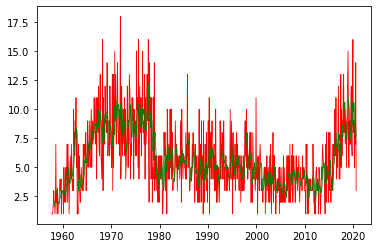

In [297]:
from matplotlib.figure import Figure
df_monthly['counts'].max()
df_monthly[df_monthly['counts']==12]
df_monthly['rolling_months'] = df_monthly.rolling(5).mean()
plt.Figure(figsize=(14,10))
plt.plot(df_monthly['Year-Month'],df_monthly['counts'],linewidth=0.8,color = 'r')

plt.plot(df_monthly['Year-Month'],df_monthly['rolling_months'],linewidth=0.8, color='g')


In [198]:
# df_monthly.head(50)

,Year-Month,counts,rolling_months
0,1964-09-01,1,NaN
1,1964-12-01,1,NaN
2,1965-02-01,1,NaN
3,1965-05-01,1,NaN
4,1966-07-01,1,1.00
5,1966-09-01,1,1.00
6,1966-12-01,1,1.00
7,1967-02-01,1,1.00
8,1967-04-01,1,1.00
9,1967-06-01,1,1.00


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [298]:
df_data.groupby('Month').size().reset_index(name='counts')

,Month,counts
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


In [299]:
df_country = df_data.groupby(['Country','Year']).size().reset_index(name='counts')
df_country[df_country['Country'].isin(['Russia','Kazakhstan'])]

,Country,Year,counts
207,Kazakhstan,1957,2
208,Kazakhstan,1958,5
209,Kazakhstan,1959,4
210,Kazakhstan,1960,9
211,Kazakhstan,1961,7
...,...,...,...
355,Russia,2016,6
356,Russia,2017,6
357,Russia,2018,8
358,Russia,2019,9


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [300]:
df_data.head()
df_price = df_data.groupby('Year',as_index=False).agg({'Price':'mean'})

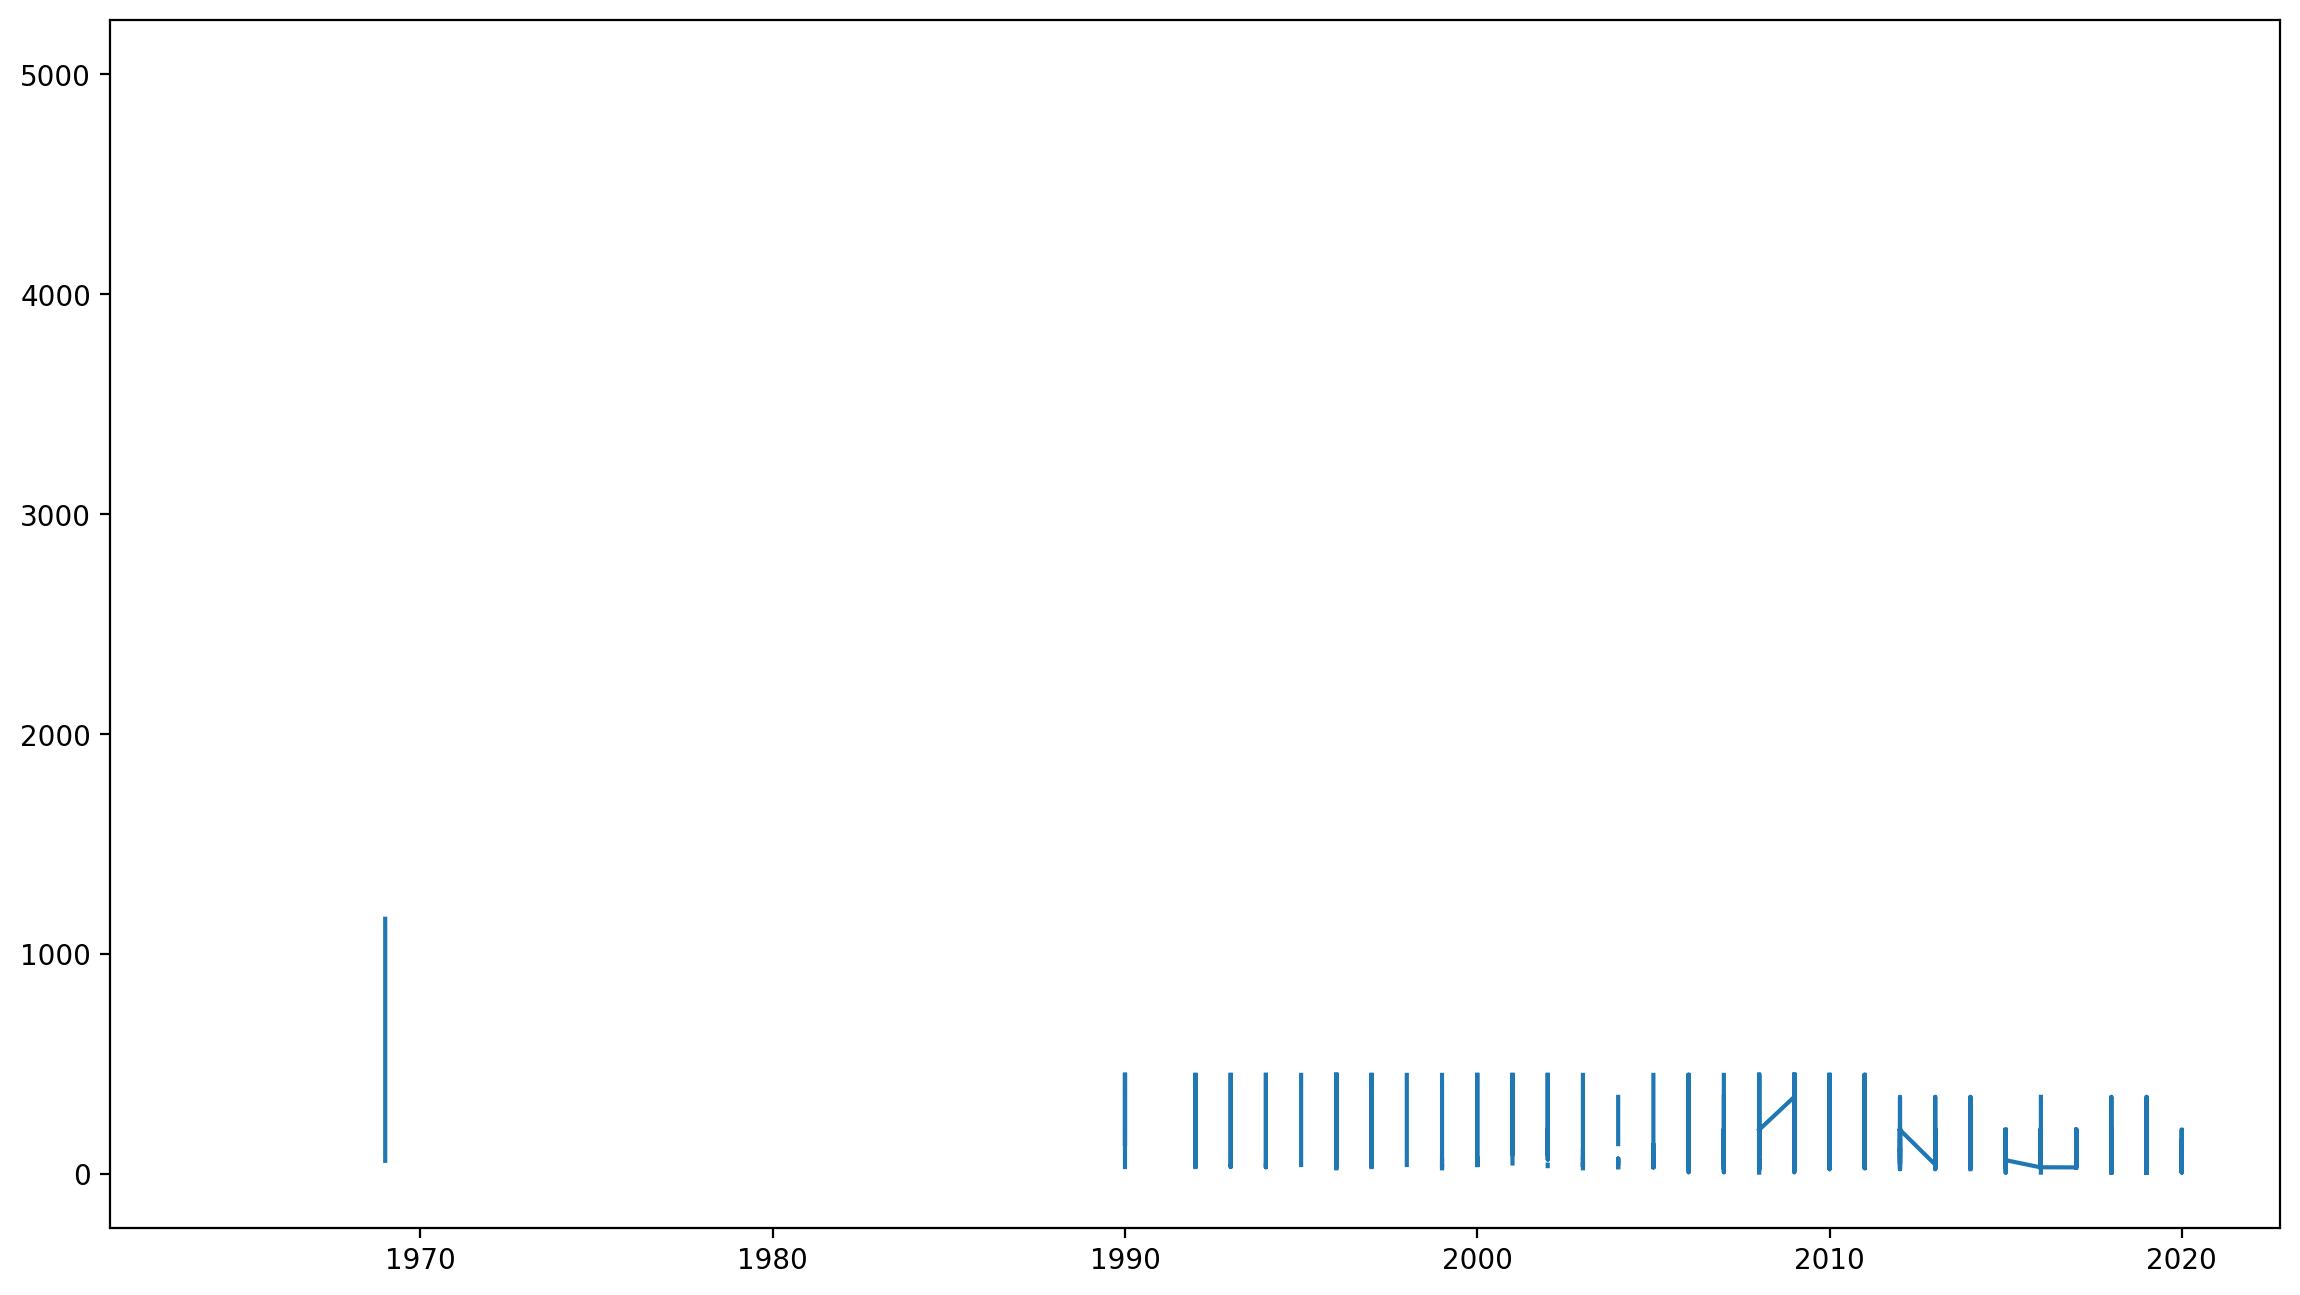

In [301]:
plt.figure(figsize=(14,8),dpi=200)
plt.plot(df_data['Year'],df_data['Price'])

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [302]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code,Year,Month,Year-Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8,2020-08-01
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8,2020-08-01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8,2020-08-01
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7,2020-07-01
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7,2020-07-01


In [303]:
df_orgs = df_data.groupby(['Year','Organisation']).size().reset_index(name='counts')

In [304]:
df_orgs.head()

,Year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5


In [305]:
px.bar(data_frame=df_orgs,x='Year',y='counts',color='Organisation')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [306]:
df_cold_war = df_data[df_data['Year']<1992]

In [307]:
df_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country Code,Year,Month,Year-Month
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,China,CHN,1991,12,1991-12-01
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan,KAZ,1991,12,1991-12-01
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia,RUS,1991,12,1991-12-01
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,France,FRA,1991,12,1991-12-01
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,12,1991-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2,1958-02-01
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2,1958-02-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12,1957-12-01
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,11,1957-11-01


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [308]:
df_cold_war['Country'].unique()

array(['China', 'Kazakhstan', 'Russia', 'France', 'USA', 'Japan',
       'Israel', 'India', 'Kenya', 'Australia'], dtype=object)

In [309]:
df_cold_war = df_cold_war[df_cold_war['Country'].isin(['USA','Kazakhstan','Russia'])]

In [310]:
df_cold_war = df_cold_war.groupby('Country').size().reset_index(name='counts')

In [311]:
px.pie(df_cold_war,values='counts',names='Country')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [315]:
df_cold_yearly = df_data[df_data['Year']<1992]
df_cold_yearly = df_cold_yearly[df_cold_yearly['Country'].isin(['USA','Kazakhstan','Russia'])]

In [317]:
df_cold_yearly.loc[df_cold_yearly['Country']=='Kazakhstan','Country'] = 'Russia'

In [318]:
df_yearly = df_cold_yearly.groupby(['Country','Year']).size().reset_index(name='counts')

In [320]:
df_yearly.head()
px.bar(df_yearly,'Year','counts',color='Country')

## Chart the Total Number of Mission Failures Year on Year.

In [322]:
df_cold_failed = df_cold_yearly[df_cold_yearly['Mission_Status']=='Failure']

In [324]:
df_cold_failed = df_cold_failed.groupby(['Country','Year']).size().reset_index(name='counts')

In [326]:
px.bar(df_cold_failed,'Year','counts',color='Country')

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [332]:
df_missions = df_data.groupby('Year',as_index=False).agg({'Mission_Status':'count'})
df_failures = df_data[df_data['Mission_Status']=='Failure'].groupby('Year',as_index=False).agg({'Mission_Status':'count'})
# df_yearly
df_missions
print(df_failures.head())

   Year  Mission_Status
0  1957               1
1  1958              20
2  1959               9
3  1960              20
4  1961              17


In [333]:
df_failures['%_failures'] = df_failures['Mission_Status']/df_missions['Mission_Status']*100

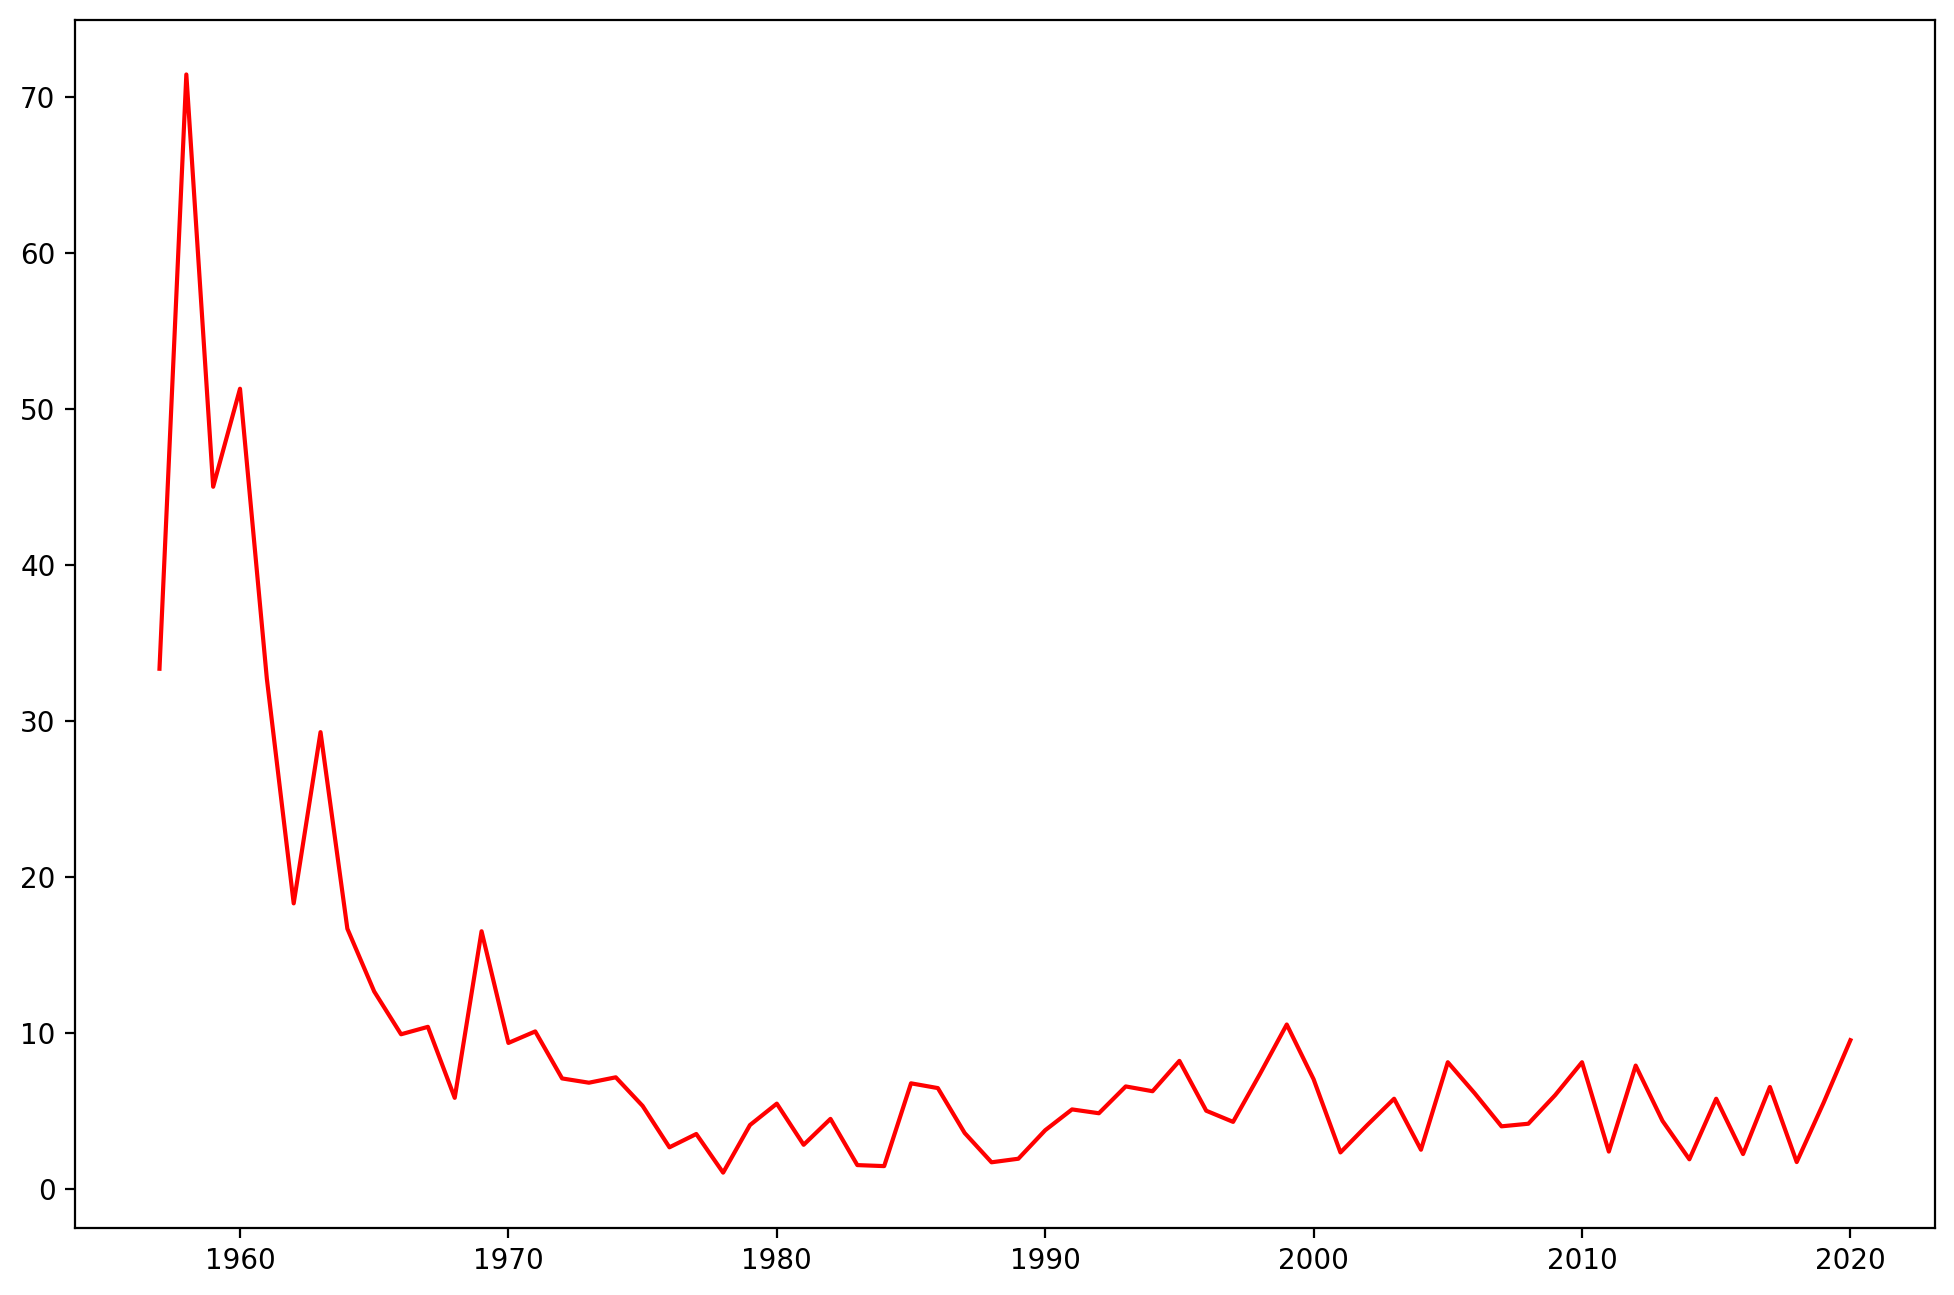

In [336]:
df_failures
plt.figure(figsize=(12,8),dpi=200)
plt.plot(df_failures['Year'],df_failures['%_failures'],color='red')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [340]:
df_c_launches = df_data[df_data['Mission_Status']=='Success'].groupby(['Country','Year'],as_index=False).agg({'Detail':'count'})

In [341]:
df_c_launches.head()



# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [343]:
df_o_year = df_data.groupby(['Organisation','Year'],as_index=False).agg({'Detail':'count'})

In [345]:
df_o_year.head()
px.bar(df_o_year,'Year','Detail',color='Organisation')